In [1]:
#!pip install mplstereonet
!pip install pandas
import numpy as np
import matplotlib.pyplot as plt
import mplstereonet
from IPython.display import HTML, YouTubeVideo

In [2]:


# HELPER FUNCTIONS
def plot_planes(planes, title="Planes on Stereonet"):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='stereonet')
    
    for strike, dip in planes:
        ax.plane(strike, dip, linewidth=2)
        pt, pp = mplstereonet.pole(strike, dip)
        ax.pole(strike, dip, 'o', markersize=8)
        
    ax.grid(True)
    ax.set_title(title)
    plt.show()

def plot_poles(poles, title="Poles on Stereonet"):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='stereonet')
    
    for (trend, plunge) in poles:
        ax.line(trend, plunge, marker='o', markersize=8)
        
    ax.grid(True)
    ax.set_title(title)
    plt.show()

print("Helper functions defined: plot_planes() and plot_poles()")

Helper functions defined: plot_planes() and plot_poles()


In [7]:
import pandas as pd

df = pd.read_csv('strikes and dips.csv')  # Load CSV into a DataFrame
print(df)  # Display the data

       ID  Strike   Dip              Date    MeasuredBy  \
0    P1-3    43.3  51.0  2025-01-03 23:24   Carlos Diaz   
1    P2-4   133.5  80.0  2025-01-12 17:55    John Smith   
2    P4-1   119.4  87.8  2025-01-16 02:19   Carlos Diaz   
3    P1-7    43.2  49.4  2025-01-10 19:48  Sarah Parker   
4    P1-2    44.2  50.6  2025-01-15 22:05      Mei Chen   
5    P3-9   226.6  41.4  2025-01-13 01:42   Carlos Diaz   
6    P3-6   226.1  38.1  2025-01-14 15:10      Mei Chen   
7    P2-7   136.1  79.3  2025-01-26 22:19      Mei Chen   
8   P1-10    43.1  51.3  2025-01-30 22:38   Carlos Diaz   
9    P2-9   136.8  81.6  2025-01-24 06:09    John Smith   
10  P3-10   226.4  41.6  2025-01-16 20:34   Carlos Diaz   
11   P2-5   133.2  78.3  2025-01-26 16:34   Carlos Diaz   
12   P1-4    45.4  48.4  2025-01-15 08:16  Sarah Parker   
13   P4-2   351.7  82.2  2025-01-08 05:35   Carlos Diaz   
14   P2-8   136.7  79.5  2025-01-04 08:47  Sarah Parker   
15   P3-4   225.0  41.6  2025-01-04 11:29    John Smith 

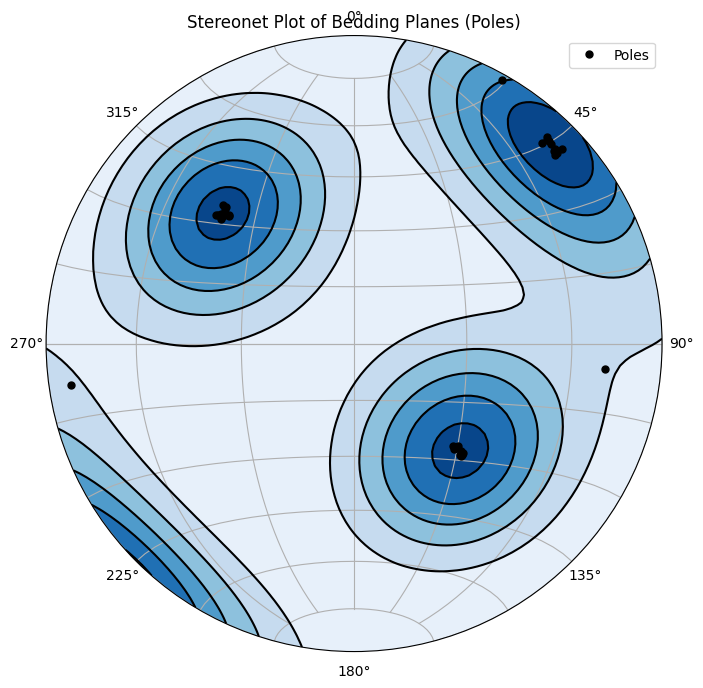

In [8]:
# Extract strike and dip values
strike = df["Strike"].values
dip = df["Dip"].values

# Create a Schmidt net plot
fig, ax = mplstereonet.subplots(figsize=(8, 8))

# Convert strike and dip into poles and plot them
ax.pole(strike, dip, 'ko', markersize=5, label="Poles")

# Add density contours to observe clustering
ax.density_contourf(strike, dip, measurement='poles', cmap='Blues')
ax.density_contour(strike, dip, measurement='poles', colors='black')

# Labels and display
ax.grid()
ax.legend()
plt.title("Stereonet Plot of Bedding Planes (Poles)")
plt.show()

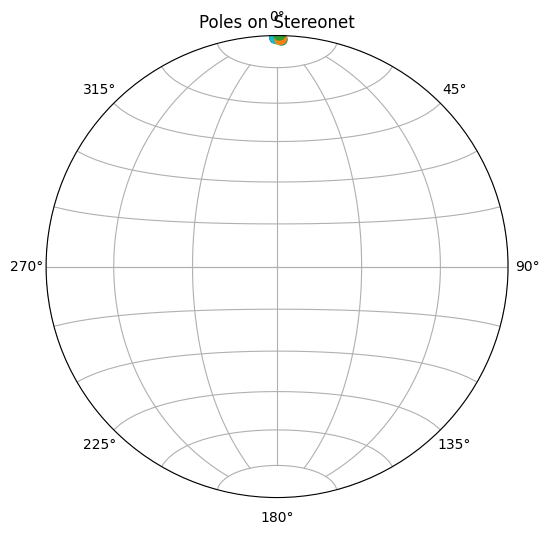

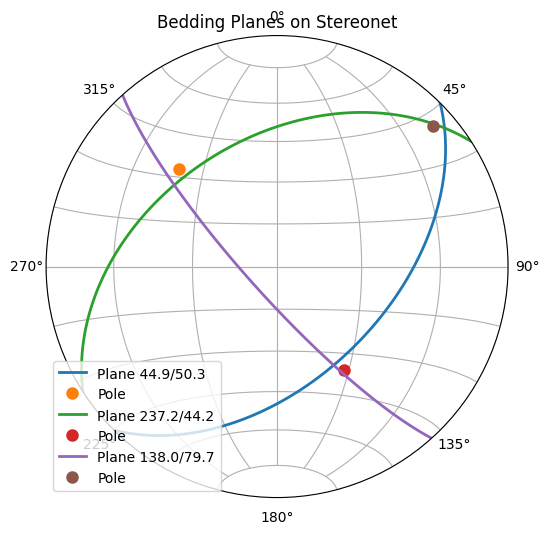

In [ ]:
pip install scikit-learn
from sklearn.cluster import KMeans

# Prepare data for clustering
data = np.column_stack((df["Strike"].values, df["Dip"].values))

# Use KMeans clustering to identify 3 bedding plane sets
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(data)

# Compute mean strike and dip for each cluster
bedding_sets = df.groupby("Cluster")[["Strike", "Dip"]].mean().reset_index()
planes = list(zip(bedding_sets["Strike"], bedding_sets["Dip"]))

# Convert all strike/dip pairs into poles
poles = [mplstereonet.pole(strike, dip) for strike, dip in zip(df["Strike"], df["Dip"])]

# Function to plot great circles for bedding planes
def plot_planes(planes, title="Planes on Stereonet"):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='stereonet')
    
    for strike, dip in planes:
        ax.plane(strike, dip, linewidth=2, label=f"Plane {strike:.1f}/{dip:.1f}")
        pt, pp = mplstereonet.pole(strike, dip)
        ax.pole(strike, dip, 'o', markersize=8, label="Pole")

    ax.grid(True)
    ax.legend()
    ax.set_title(title)
    plt.show()

# Function to plot poles
def plot_poles(poles, title="Poles on Stereonet"):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='stereonet')

    for (trend, plunge) in poles:
        ax.line(trend, plunge, marker='o', markersize=8)
        
    ax.grid(True)
    ax.set_title(title)
    plt.show()

# Plot the stereonets
plot_poles(poles, title="Poles on Stereonet")
plot_planes(planes, title="Bedding Planes on Stereonet")